In [1]:
import numpy as np

#첫번째 할 일은 좌표값들을 생성하기 위해 numpy 패키지를 임포트하는 것입니다. 코드는 아래와 같습니다.
#위 코드에서 볼 수 있듯이 y = 0.1 * x + 0.3 관계를 가지는 데이터를 생성했습니다. 
#하지만 정규분포(normal distribution)를 따라 약간의 편차를 두어 완전히 직선에 일치하지 않는 리얼리틱한 예를 만들었습니다.
num_points = 1000
vectors_set = []
for i in xrange(num_points):
         x1= np.random.normal(0.0, 0.55)
         y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

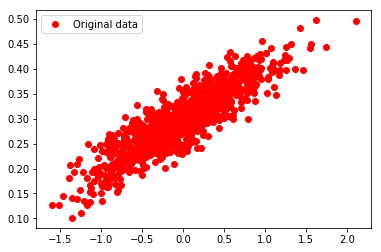

In [2]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()

# 결과는 아래와 같다. 

In [5]:
#코스트 함수(Cost Function)와 그래디언트 디센트(Gradient Descent) 알고리즘
#입력데이터 x_data를 이용해 출력 데이터 y_data를 만들 수 있는 최적의 파라메타 W와 b를 찾도록 텐서플로우 코드를 만드는 것이 목적이며 
#이것은 y\_data = W * x\_data + b 와 같은 직선으로 나타납니다. 
#독자는 W가 0.1, b가 0.3에 근사한 값이어야 한다는 걸 알지만 텐서플로우는 모르고 있어 스스로 찾아내야 합니다.
import tensorflow as tf
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b
loss = tf.reduce_mean(tf.square(y - y_data))

In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [8]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
for step in xrange(8):
   sess.run(train)
print step, sess.run(W), sess.run(b)

7 [ 0.10570563] [ 0.30017683]


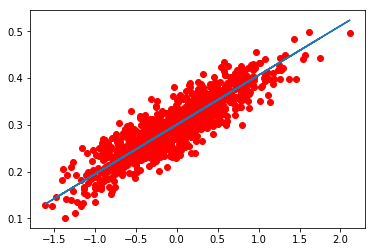

In [12]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.show()

In [11]:
print(step, sess.run(W), sess.run(b))

(7, array([ 0.10570563], dtype=float32), array([ 0.30017683], dtype=float32))
